In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir=r'C:\Users\Anjali\Desktop\cats_and_dog_small\train'
validation_dir=r'C:\Users\Anjali\Desktop\cats_and_dog_small\validation'
test_dir=r'C:\Users\Anjali\Desktop\cats_and_dog_small\test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,target_size=(150,150),batch_size=32,class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    validation_dir,target_size=(150,150),batch_size=32,class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [12]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [13]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50,
                            callbacks=[checkpoint_cb])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
 63/100 [=================>............] - ETA: 7:35 - loss: 0.5057 - acc: 0.7385

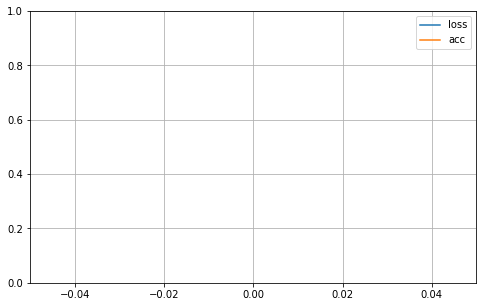

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
hist_df=pd.DataFrame(history.history)

In [17]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [18]:
model.evaluate_generator(test_generator,steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.2115485654771328, 0.919]